In [82]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [84]:
import yfinance as yf

In [86]:
import datetime as dt

stock="POWERGRID.NS"
start=dt.datetime(2000, 1, 1)
end=dt.datetime(2024, 11, 1)

df=yf.download(stock, start, end)

C:\Users\HP\AppData\Local\Temp\ipykernel_24428\3925845730.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [87]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545425,35.424693,26.900120,29.051483,855215656
2007-10-08,30.879330,33.645367,30.685221,33.645367,126671715
2007-10-09,32.982162,33.273323,29.229410,30.895502,116725709
2007-10-10,33.289505,33.968883,32.998344,33.839477,67931378
2007-10-11,37.009899,38.821573,32.998338,38.821573,106320954


In [89]:
df.shape

(4208, 5)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [94]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [96]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.483549,80.517027,78.462750,79.520589,1.188963e+07
std,63.570576,64.313382,62.779670,63.552224,2.061999e+07
min,19.001734,20.312198,17.036038,20.213913,0.000000e+00
25%,36.529129,37.105426,35.989636,36.566532,4.799653e+06
50%,55.504944,56.145819,54.762125,55.611507,8.344398e+06
75%,83.112980,84.105064,82.127445,83.135587,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [98]:
df = df.reset_index()

In [100]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

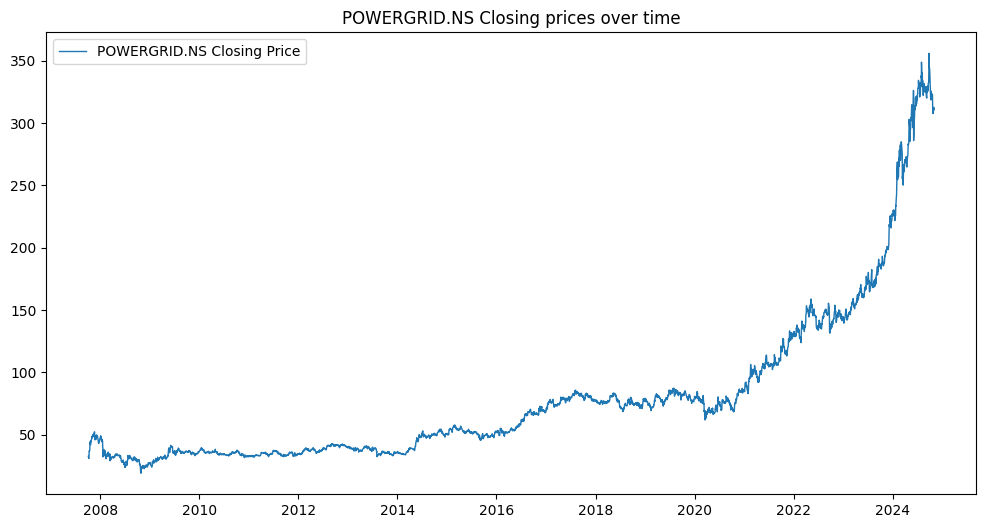

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'],df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

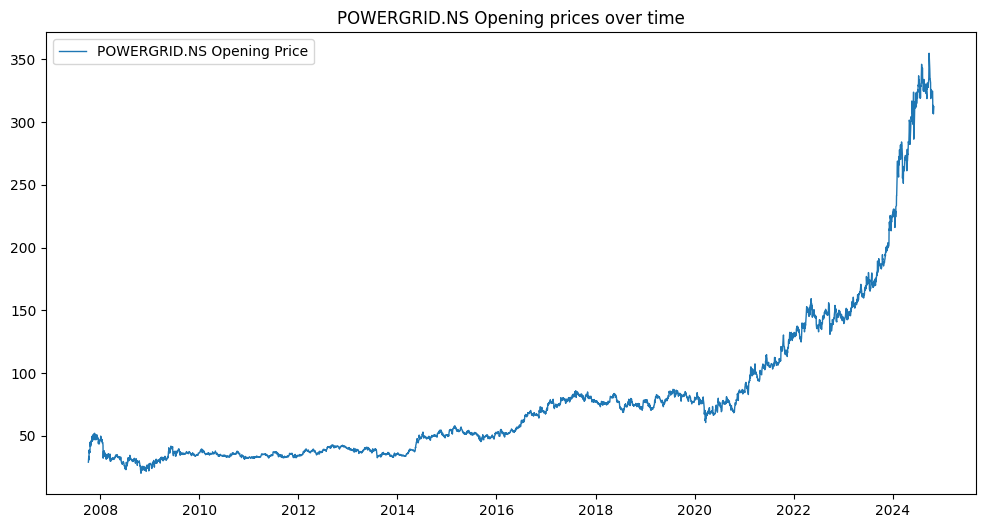

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'],df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

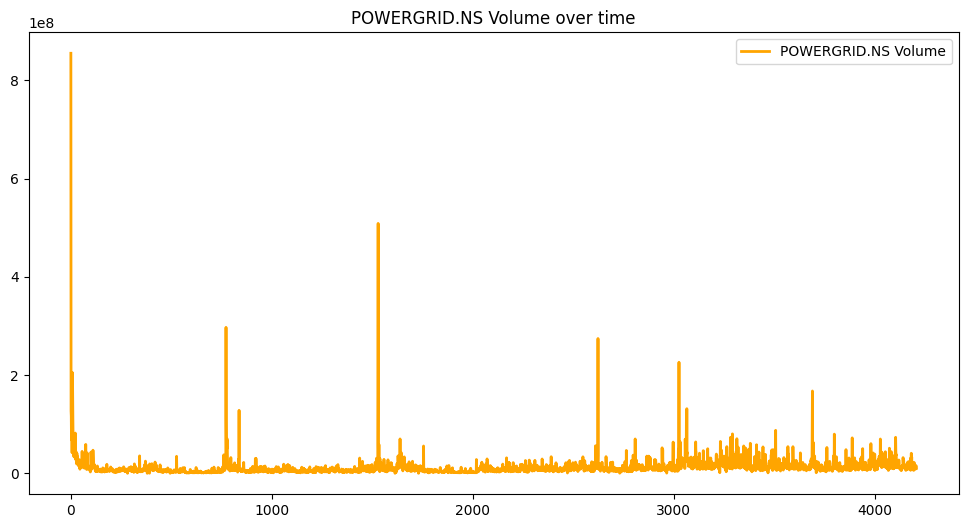

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2,color='orange')
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [107]:
ticker = yf.Ticker(stock)
splits = ticker.splits
splits.index = splits.index.tz_localize(None)

splits

Date
2021-07-29    1.333333
2023-09-12    1.333333
Name: Stock Splits, dtype: float64

In [109]:
start_ts=pd.Timestamp(start).tz_localize(None)
end_ts=pd.Timestamp(end).tz_localize(None)

# Filter splits within range
splits_in_range=splits.loc[start_ts:end_ts]

In [110]:
if not splits_in_range.empty:
    print(f"📉 Stock split history for {stock}:")
    print(splits)
else:
    print(f"No stock splits recorded for {stock}.")

📉 Stock split history for POWERGRID.NS:
Date
2021-07-29    1.333333
2023-09-12    1.333333
Name: Stock Splits, dtype: float64


In [114]:
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
df_new = df[(df['Date'] >= start_ts) & (df['Date'] <= end_ts)]

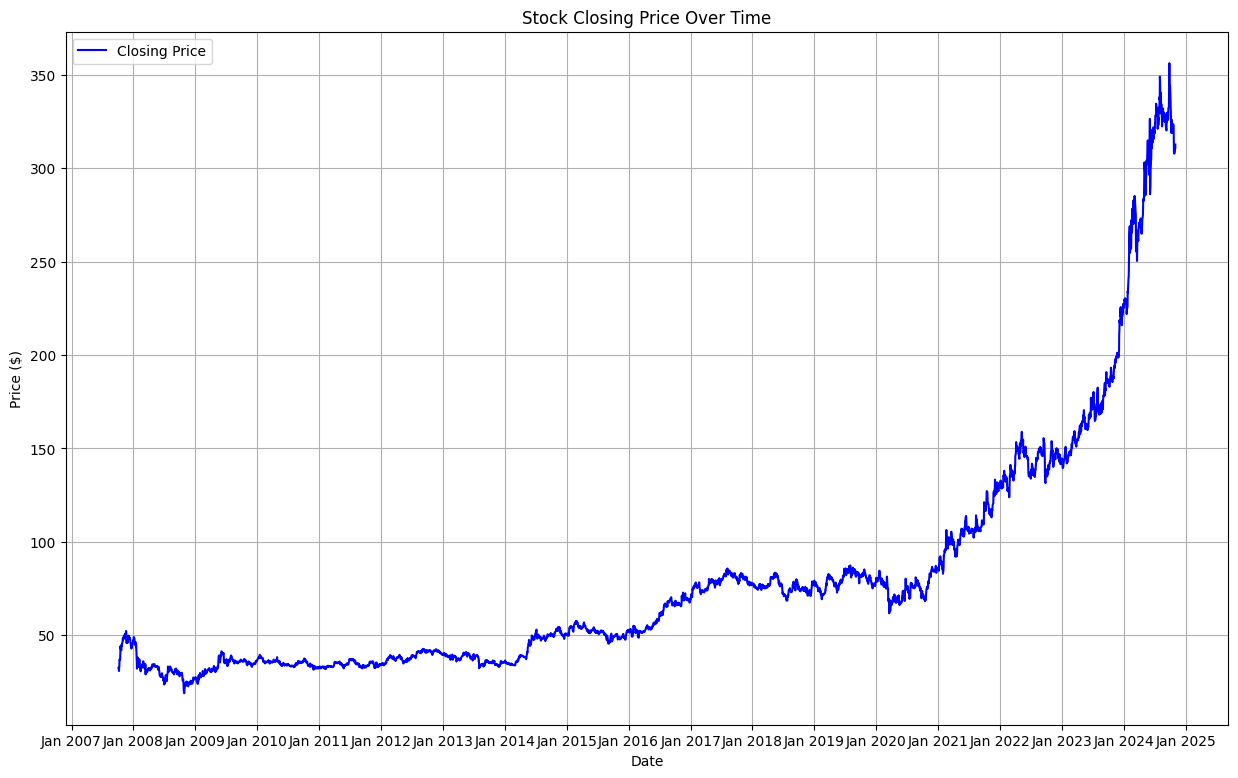

In [116]:
import matplotlib.dates as mdates
plt.figure(figsize=(15,9))
plt.plot(df_new['Date'], df['Close'],label='Closing Price',color='blue')
plt.title('Stock Closing Price Over Time')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick each Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

In [120]:
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

In [148]:
df['Return_1d'] = df['Close'].pct_change()
df['Return_5d'] = df['Close'].pct_change(5)

In [150]:
df['Volatility_5d'] = df['Return_1d'].rolling(window=5).std()

In [152]:
df['Price_diff'] = df['Close'].diff()
df['Up'] = (df['Price_diff'] > 0).astype(int)

In [154]:
df['Volume_Change'] = df['Volume'].pct_change()

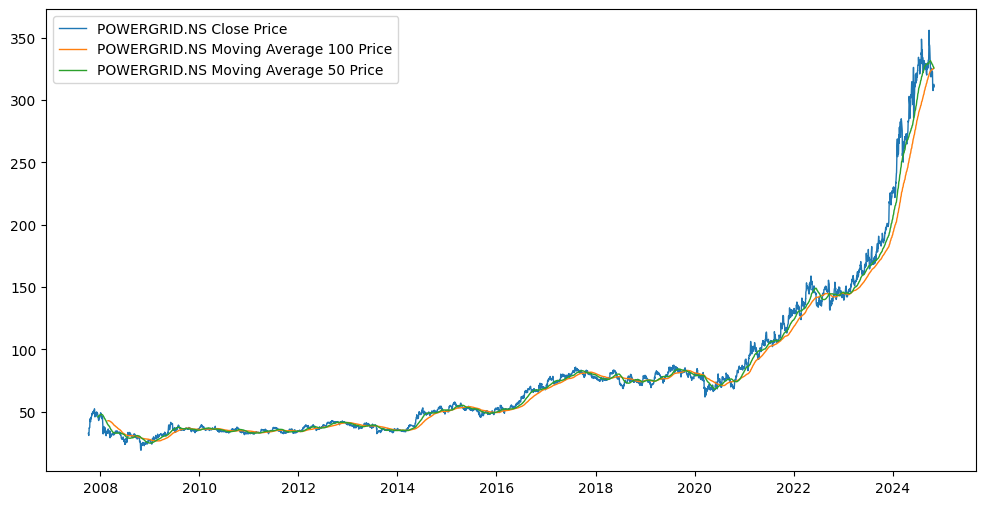

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'],df['Close'], label = f'{stock} Close Price', linewidth = 1)
plt.plot(df['Date'],df['SMA_100'] ,label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(df['Date'],df['SMA_50'], label = f'{stock} Moving Average 50 Price', linewidth = 1)
plt.legend()
plt.show()

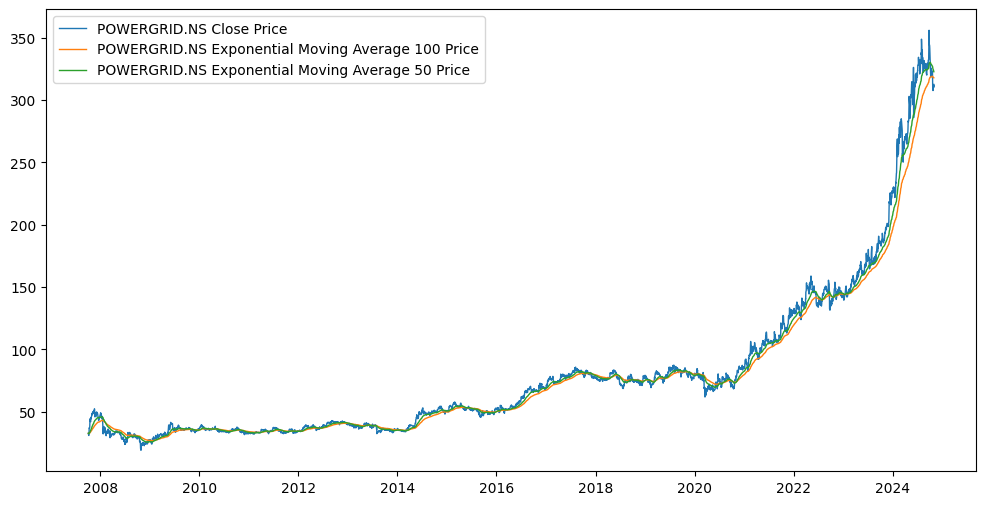

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'],df['Close'], label = f'{stock} Close Price', linewidth = 1)
plt.plot(df['Date'],df['EMA_100'] ,label = f'{stock} Exponential Moving Average 100 Price', linewidth = 1)
plt.plot(df['Date'],df['EMA_50'], label = f'{stock} Exponential Moving Average 50 Price', linewidth = 1)
plt.legend()
plt.show()

In [125]:
df['Tomorrow'] = df['Close'].shift(-1)

In [160]:
df.dropna(inplace=True)

In [162]:
df

Price,Date,Close,High,Low,Open,Volume,SMA_100,SMA_50,EMA_100,EMA_50,Tomorrow,Return_1d,Return_5d,Volatility_5d,Price_diff,Up,Volume_Change
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,,,,,,,,,,,
104,2008-03-04,33.192451,34.421802,32.351319,34.292397,11485198,42.739490,38.693473,38.932735,37.386910,33.807125,-0.025641,0.001464,0.041326,-0.873486,0,0.142902
105,2008-03-05,33.807125,33.968882,32.383666,33.354205,8581053,42.709889,38.458603,38.831238,37.246526,32.076336,0.018518,-0.036423,0.029586,0.614674,1,-0.252860
106,2008-03-07,32.076336,33.321862,30.733755,33.321862,14251925,42.658127,38.182646,38.697477,37.043774,31.962523,-0.051196,-0.110762,0.027185,-1.730789,0,0.660860
107,2008-03-10,31.962523,32.190129,30.125410,32.125099,11713659,42.567213,37.897295,38.564112,36.844509,34.596275,-0.003548,-0.101017,0.028435,-0.113813,0,-0.178100
108,2008-03-11,34.596275,34.921428,30.954563,31.702413,19665129,42.470610,37.657826,38.485541,36.756343,33.718342,0.082401,0.015568,0.050842,2.633753,1,0.678820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4202,2024-10-24,310.996674,312.604515,307.196313,307.196313,8327779,325.179350,327.590630,318.722529,325.530907,307.732239,0.007100,-0.036237,0.013896,2.192535,1,-0.335987
4203,2024-10-25,307.732239,313.286633,305.247396,313.286633,12979410,324.993563,327.299269,318.504899,324.832920,310.168365,-0.010497,-0.048938,0.012727,-3.264435,0,0.558568
4204,2024-10-28,310.168365,312.263463,302.811258,306.465456,9610615,325.235133,326.903640,318.339819,324.257840,312.360901,0.007916,-0.038804,0.014929,2.436127,1,-0.259549


In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [166]:
X = df[['Close', 'SMA_100', 'SMA_50', 'EMA_100', 'EMA_50', 'Return_1d', 'Return_5d', 'Volatility_5d', 'Price_diff']]
y=df['Tomorrow']

In [168]:
print(X,y)

Price         Close     SMA_100      SMA_50     EMA_100      EMA_50 Return_1d  \
Ticker POWERGRID.NS                                                             
104       33.192451   42.739490   38.693473   38.932735   37.386910 -0.025641   
105       33.807125   42.709889   38.458603   38.831238   37.246526  0.018518   
106       32.076336   42.658127   38.182646   38.697477   37.043774 -0.051196   
107       31.962523   42.567213   37.897295   38.564112   36.844509 -0.003548   
108       34.596275   42.470610   37.657826   38.485541   36.756343  0.082401   
...             ...         ...         ...         ...         ...       ...   
4202     310.996674  325.179350  327.590630  318.722529  325.530907  0.007100   
4203     307.732239  324.993563  327.299269  318.504899  324.832920 -0.010497   
4204     310.168365  325.235133  326.903640  318.339819  324.257840  0.007916   
4205     312.360901  325.471086  326.518731  318.221425  323.791293  0.007069   
4206     310.314575  325.670

In [172]:
X_train,X_test=X.iloc[:int(len(df)*0.75)],X.iloc[int(len(df)*0.75):]
y_train,y_test=y.iloc[:int(len(df)*0.75)],y.iloc[int(len(df)*0.75):]

In [174]:
print(X_train , X_test)
print("/n")
print(y_train,y_test)

Price         Close    SMA_100     SMA_50    EMA_100     EMA_50 Return_1d  \
Ticker POWERGRID.NS                                                         
104       33.192451  42.739490  38.693473  38.932735  37.386910 -0.025641   
105       33.807125  42.709889  38.458603  38.831238  37.246526  0.018518   
106       32.076336  42.658127  38.182646  38.697477  37.043774 -0.051196   
107       31.962523  42.567213  37.897295  38.564112  36.844509 -0.003548   
108       34.596275  42.470610  37.657826  38.485541  36.756343  0.082401   
...             ...        ...        ...        ...        ...       ...   
3176      77.281708  72.829441  75.741215  74.675913  75.768494  0.008103   
3177      79.402603  72.918978  75.799911  74.769511  75.911008  0.027444   
3178      78.219452  73.015962  75.827663  74.837827  76.001535 -0.014901   
3179      76.707664  73.099541  75.826463  74.874853  76.029226 -0.019328   
3180      77.189674  73.171447  75.843043  74.920691  76.074734  0.006284   

In [183]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid = GridSearchCV(RandomForestRegressor(), params, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


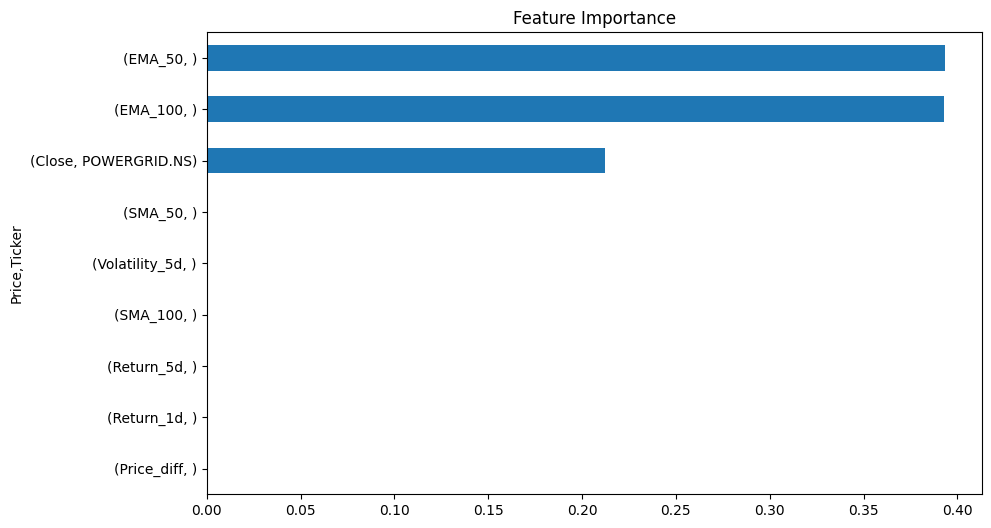

In [187]:
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

In [177]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
score=(model.score(X_test, y_test))
print(f"Accuracy score: {score:.10f}", model.score(X_train,y_train))

Mean Squared Error: 12048.671746818429
R-squared: -1.239286642091535
Accuracy score: -1.2392866421 0.999677079804276


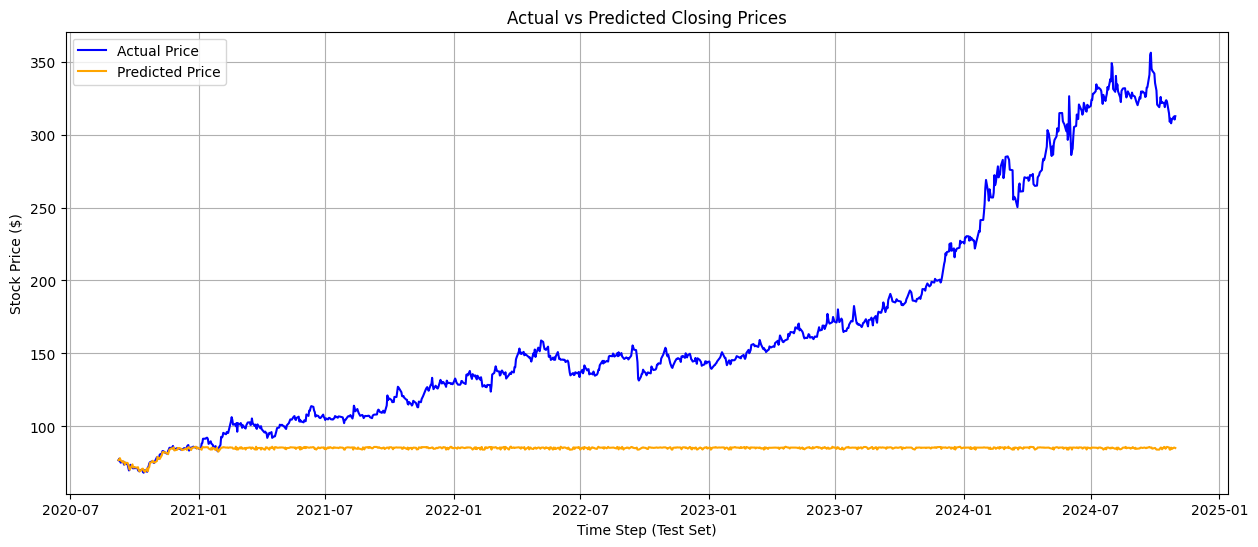

In [178]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'].iloc[int(len(df)*0.75):],y_test, label='Actual Price', color='blue')
plt.plot(df['Date'].iloc[int(len(df)*0.75):],y_pred, label='Predicted Price', color='orange')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time Step (Test Set)')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
from joblib import dump, load
dump(model, 'random_fores_stock_model.joblib')

['linear_regression_stock_model.joblib']